## HDD dataset creation

For the dataset creation we would be using the real world data from BackBlaze 2024 Q1 dataset.
Since the dataset is hugh [10+Gb of raw data], which is unbalanced in nature. 
we would be identifying the highest failing device model for our dataset creation.

In [3]:
# Import the python libraries which are significant and useful for the project

import dask.dataframe as dd
import pandas as pd

In [4]:
# Since the dataset is huge loading on pandas dataframe is not possible will be using python dask module for processing on the dataframe.
# Load the entire dataset into a Dask dataframe

ddf = dd.read_csv("/nobackup/amimalik/bits-proj/dataset/data_Q1_2024/*.csv", assume_missing=True)

In [5]:
# Check the columns of the dataset
ddf.dtypes

date                    string[pyarrow]
serial_number           string[pyarrow]
model                   string[pyarrow]
capacity_bytes                  float64
failure                         float64
                             ...       
smart_252_raw                   float64
smart_254_normalized            float64
smart_254_raw                   float64
smart_255_normalized            float64
smart_255_raw                   float64
Length: 193, dtype: object

In [6]:
# Identify the failed device counts by model
failure_counts = ddf.groupby("model")["failure"].sum().compute()

# Sort by failures in descending order
sorted_failures = failure_counts.sort_values(ascending=False)

In [7]:
# Print the sorted table
sorted_failures

model
ST12000NM0008                            144.0
TOSHIBA MG07ACA14TA                      100.0
HGST HUH721212ALN604                      93.0
TOSHIBA MG08ACA16TA                       82.0
ST8000NM0055                              79.0
                                         ...  
WDC WD5000LPVX                             0.0
WUH721816ALE6L4                            0.0
Seagate BarraCuda SSD ZA500CM10002         0.0
Seagate FireCuda 120 SSD ZA500GM10001      0.0
WDC WDS250G2B0A                            0.0
Name: failure, Length: 81, dtype: float64

In [16]:
top_15_models

model
ST12000NM0008           144.0
TOSHIBA MG07ACA14TA     100.0
HGST HUH721212ALN604     93.0
TOSHIBA MG08ACA16TA      82.0
ST8000NM0055             79.0
HGST HUH721212ALE604     65.0
ST4000DM000              63.0
ST16000NM001G            50.0
ST12000NM001G            42.0
ST14000NM001G            41.0
ST12000NM0007            37.0
ST8000DM002              36.0
ST14000NM0138            19.0
WDC WUH721816ALE6L4      16.0
WDC WUH721414ALE6L4      12.0
Name: failure, dtype: float64

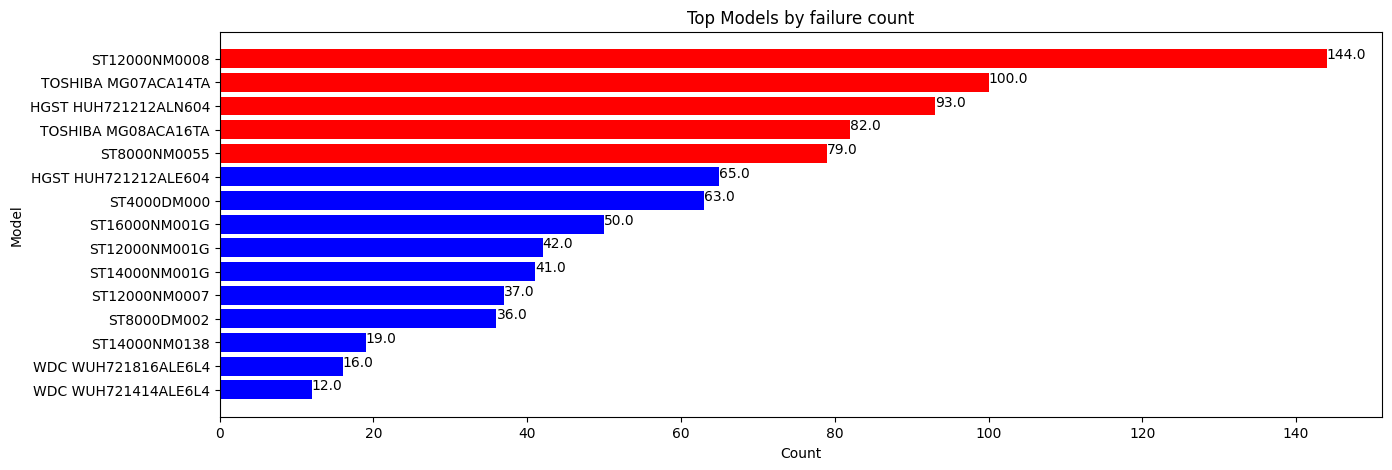

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))

# Get the top 5 models by count
top_5_models = sorted_failures.head(5)
top_15_models = sorted_failures.head(15)

# Set the color for the top 5 models as red and the rest as blue
colors = ['red' if model in top_5_models else 'blue' for model in top_15_models.index]

# Plot the horizontal bar graph
plt.barh(top_15_models.index, top_15_models.values, color=colors)

# Set the title and labels
plt.title('Top Models by failure count')
plt.xlabel('Count')
plt.ylabel('Model')

plt.gca().invert_yaxis()

for index, value in enumerate(top_15_models.values):
    plt.text(value, index, str(value))

# Show the plot
plt.show()

We will be using the device model "ST12000NM0008" for slecting the failed drive dataset creation

In [ ]:
# Filter DataFrame to rows where failure is observed
failed_devices = ddf[ddf["failure"] == 1]

In [ ]:
# Extract models matching to ST12000NM0008 in failed_devices

ST12000NM0008_failed_models = failed_devices[failed_devices["model"] == "ST12000NM0008"]

In [ ]:
# Extract serial numbers for device model ST12000NM0008 which have failed
failed_serials = ST12000NM0008_failed_models["serial_number"]  # Replace "serial_number" with your actual column name
failed_serials = failed_serials.unique().compute()
print (failed_serials)

In [ ]:
# generate the raw dataframe for the failed devices

failed_devices_df = ddf[ddf["serial_number"].isin(failed_serials)]
failed_devices_df = failed_devices_df.compute()

In [ ]:
failed_devices_df.shape

In [ ]:
failed_devices_df.to_csv("/nobackup/amimalik/bits-proj/dataset/dimensions/failed_devices_df.csv", index=False)